In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('final data.csv')

In [3]:
df

,time,temperature_2m (°C),apparent_temperature (°C),surface_pressure (hPa),precipitation (mm),rain (mm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),city
0,2013-01-01T00:00,22.9,18.8,955.7,0.0,0.0,0.0,15.0,27.0,Abuja
1,2013-01-01T01:00,22.3,18.3,955.4,0.0,0.0,0.0,14.3,28.0,Abuja
2,2013-01-01T02:00,21.8,17.8,954.8,0.0,0.0,0.0,13.7,30.0,Abuja
3,2013-01-01T03:00,21.4,17.5,954.4,0.0,0.0,0.0,13.3,33.0,Abuja
4,2013-01-01T04:00,21.0,17.0,954.0,0.0,0.0,0.0,13.2,35.0,Abuja
...,...,...,...,...,...,...,...,...,...,...
364127,2023-05-21T20:00,27.5,31.5,1009.6,0.0,0.0,47.0,16.4,213.0,Lagos
364128,2023-05-21T21:00,27.4,31.5,1010.5,0.0,0.0,47.0,15.1,220.0,Lagos
364129,2023-05-21T22:00,27.2,31.7,1011.3,0.0,0.0,51.0,13.2,227.0,Lagos
364130,2023-05-21T23:00,27.1,32.4,1012.1,0.0,0.0,49.0,7.4,223.0,Lagos


<Axes: >

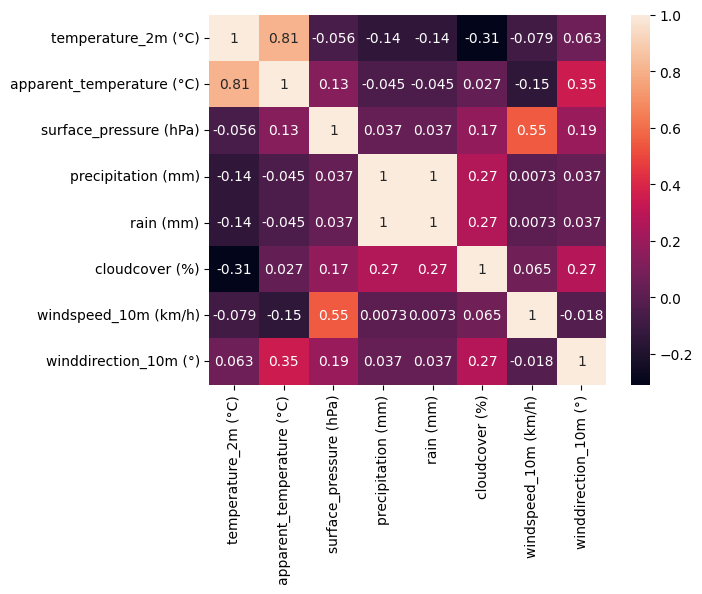

In [4]:
sns.heatmap(data= df.corr(), annot=True)

In [5]:
df.describe()

,temperature_2m (°C),apparent_temperature (°C),surface_pressure (hPa),precipitation (mm),rain (mm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°)
count,364132.000000,364132.000000,364132.000000,364132.000000,364132.000000,364132.000000,364132.000000,364132.000000
mean,27.341947,30.118975,980.317761,0.138122,0.138122,42.460220,7.600938,191.939247
std,3.836115,4.407279,19.780040,0.573147,0.573147,32.383437,4.132927,79.395154
min,16.000000,12.000000,949.400000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,24.500000,27.600000,964.650000,0.000000,0.000000,16.000000,4.500000,153.000000
50%,26.700000,30.300000,977.100000,0.000000,0.000000,35.000000,6.800000,210.000000
75%,29.600000,32.800000,992.975000,0.000000,0.000000,66.000000,10.100000,239.000000
max,41.800000,44.600000,1018.200000,23.000000,23.000000,100.000000,29.800000,360.000000


In [6]:
#function to categorize balance 
# Define the thresholds for high, mid, and low 
high_threshold = df['apparent_temperature (°C)'].quantile(0.75)
mid_threshold = df['apparent_temperature (°C)'].quantile(0.5)
low_threshold = df['apparent_temperature (°C)'].quantile(0.25)

# Define a function to categorize the temperature column
def categorize(x):
    if x >= high_threshold:
        return 'high'
    elif x >= mid_threshold:
        return 'mid'
    else:
        return 'low'
    
# Create a new column called temp_category by applying the categorize function to the Apparent tem column
df['temp_category'] = df['apparent_temperature (°C)'].apply(categorize)

In [7]:
df

,time,temperature_2m (°C),apparent_temperature (°C),surface_pressure (hPa),precipitation (mm),rain (mm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),city,temp_category
0,2013-01-01T00:00,22.9,18.8,955.7,0.0,0.0,0.0,15.0,27.0,Abuja,low
1,2013-01-01T01:00,22.3,18.3,955.4,0.0,0.0,0.0,14.3,28.0,Abuja,low
2,2013-01-01T02:00,21.8,17.8,954.8,0.0,0.0,0.0,13.7,30.0,Abuja,low
3,2013-01-01T03:00,21.4,17.5,954.4,0.0,0.0,0.0,13.3,33.0,Abuja,low
4,2013-01-01T04:00,21.0,17.0,954.0,0.0,0.0,0.0,13.2,35.0,Abuja,low
...,...,...,...,...,...,...,...,...,...,...,...
364127,2023-05-21T20:00,27.5,31.5,1009.6,0.0,0.0,47.0,16.4,213.0,Lagos,mid
364128,2023-05-21T21:00,27.4,31.5,1010.5,0.0,0.0,47.0,15.1,220.0,Lagos,mid
364129,2023-05-21T22:00,27.2,31.7,1011.3,0.0,0.0,51.0,13.2,227.0,Lagos,mid
364130,2023-05-21T23:00,27.1,32.4,1012.1,0.0,0.0,49.0,7.4,223.0,Lagos,mid


<Axes: xlabel='temp_category', ylabel='count'>

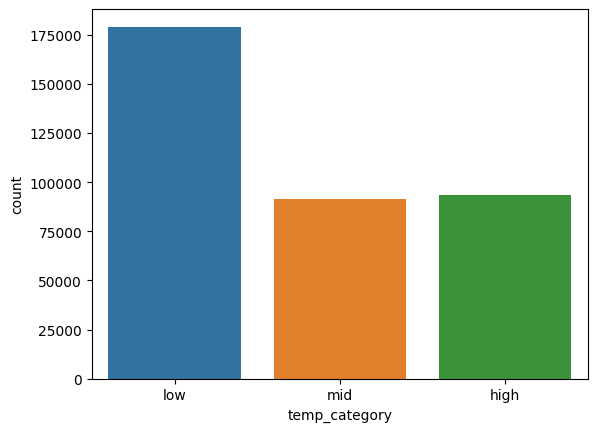

In [8]:
sns.countplot(df, x='temp_category')

In [9]:
df.columns

Index(['time', 'temperature_2m (°C)', 'apparent_temperature (°C)',
       'surface_pressure (hPa)', 'precipitation (mm)', 'rain (mm)',
       'cloudcover (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)',
       'city', 'temp_category'],
      dtype='object')

In [29]:
#renaming columns
cols = {
    'temperature_2m (°C)': 'temperature_2m', 'apparent_temperature (°C)': 'apparent_temperature',
       'surface_pressure (hPa)': 'surface_pressure', 'precipitation (mm)': 'precipitation', 'rain (mm)': 'rain',
       'cloudcover (%)': 'cloudcover', 'windspeed_10m (km/h)': 'windspeed_10m', 'winddirection_10m (°)': 'winddirection_10m'
}
df.rename(columns=cols, inplace=True)

Text(0, 0.5, 'temperature in degrees')

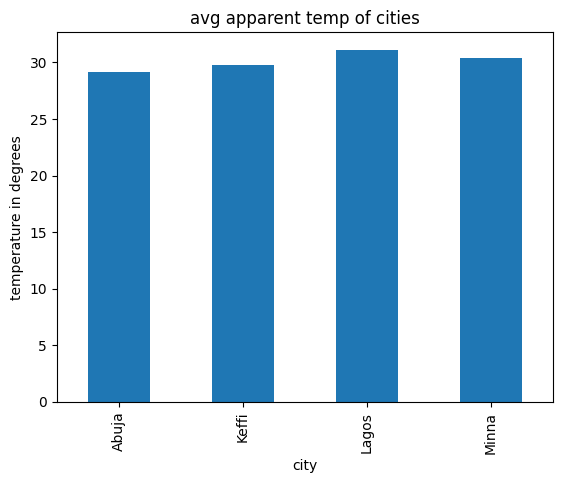

In [11]:
t = df.groupby('city').apparent_temperature.mean()
t.plot(kind='bar')
plt.title('avg apparent temp of cities')
plt.ylabel('temperature in degrees')

Text(0, 0.5, 'pressure in hectopascal')

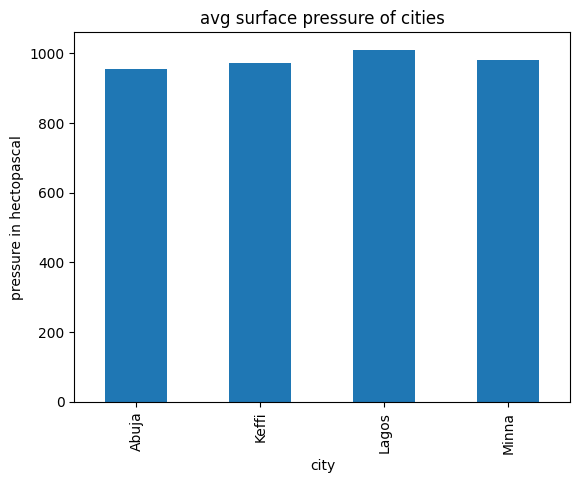

In [12]:
s = df.groupby('city').surface_pressure.mean()  
s.plot(kind='bar')
plt.title('avg surface pressure of cities')
plt.ylabel('pressure in hectopascal')

Text(0, 0.5, 'precipitation in mm')

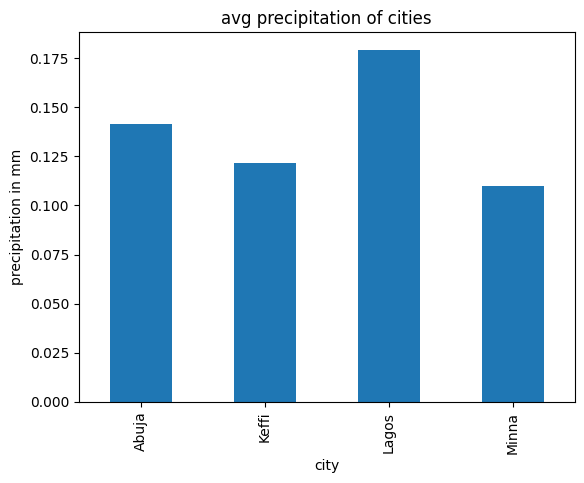

In [13]:
p = df.groupby('city').precipitation.mean()
p.plot(kind='bar')
plt.title('avg precipitation of cities')
plt.ylabel('precipitation in mm')

Text(0, 0.5, 'rain in mm')

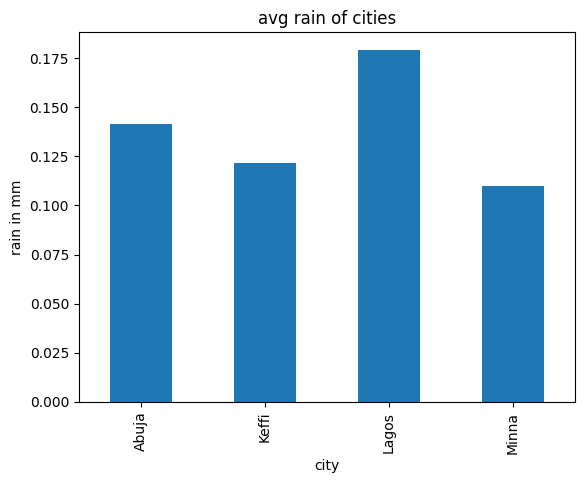

In [14]:
r = df.groupby('city').rain.mean()     
r.plot(kind='bar')
plt.title('avg rain of cities')
plt.ylabel('rain in mm')

Text(0, 0.5, '% of cloudcover')

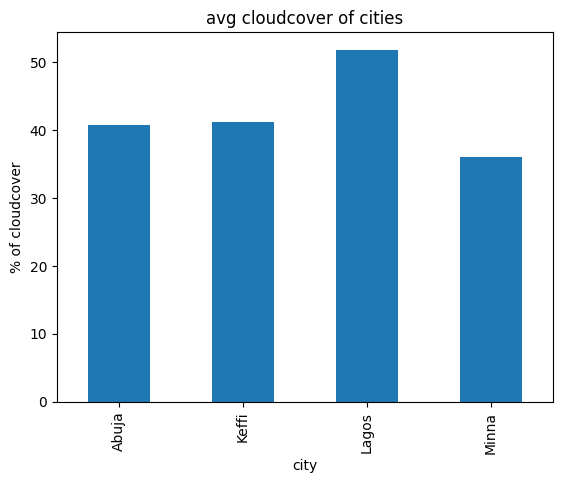

In [15]:
c = df.groupby('city').cloudcover.mean()  
c.plot(kind='bar')
plt.title('avg cloudcover of cities')
plt.ylabel('% of cloudcover')

Text(0, 0.5, 'windspeed in km/h')

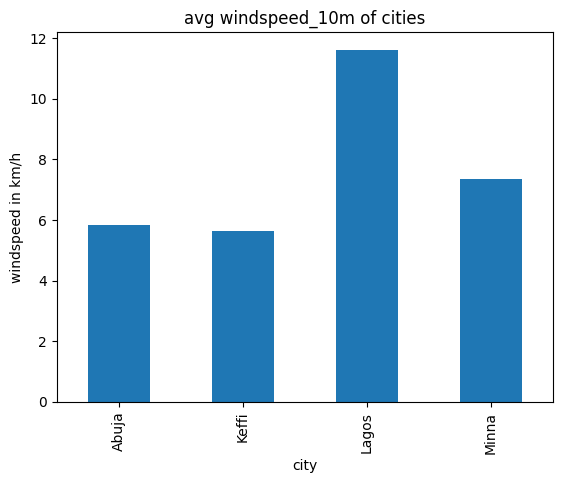

In [16]:
w = df.groupby('city').windspeed_10m.mean()  
w.plot(kind='bar')
plt.title('avg windspeed_10m of cities')
plt.ylabel('windspeed in km/h')

In [31]:
#converting time column to date time format
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')

In [47]:
#setting index as time
df = df.set_index(df['time'])

Text(0.5, 1.0, 'Yearly Avg surface pressure across all cities')

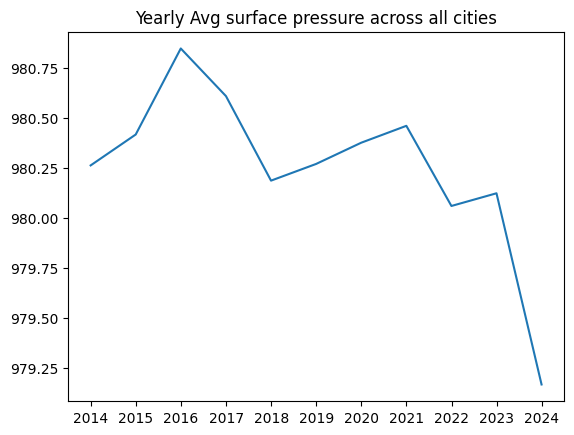

In [52]:
plt.plot(df['surface_pressure'].resample('Y').mean())
plt.title('Yearly Avg surface pressure across all cities')

Text(0.5, 1.0, 'Yearly Avg temperature across all cities')

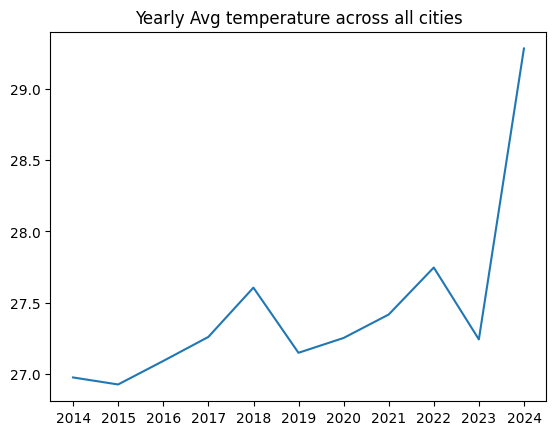

In [53]:
plt.plot(df['temperature_2m'].resample('Y').mean())
plt.title('Yearly Avg temperature across all cities')

Text(0.5, 1.0, 'Yearly Avg rain across all cities')

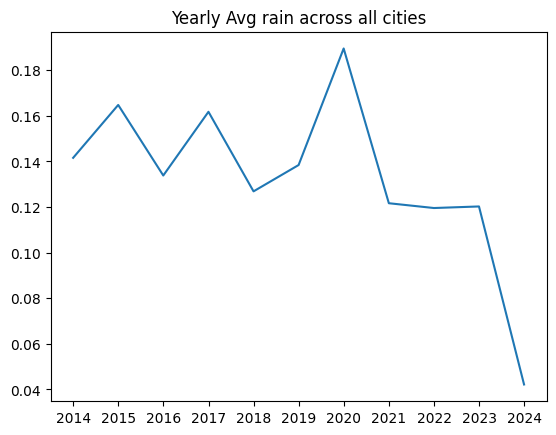

In [54]:
plt.plot(df['rain'].resample('Y').mean())
plt.title('Yearly Avg rain across all cities')